In [10]:
import torch
import torch.nn as nn
from models import SingleEncoderModel, DualEncoderModel
from data_utils import HM_Dataset
from generate_utils import load_DE, load_SE, nucleus_token_by_token_generate
import matplotlib.pyplot as plt
import seaborn as sns
from plot_utils import save_attention_maps_with_split, save_attention_maps

In [11]:
nvis = None
subfolder = 'T2_M2'
# subfolder = 'T10_M2'
# subfolder = 'T2_M10'
# subfolder = 'T10_M10'

In [12]:
test_dataset = HM_Dataset("data/test_" + subfolder + ".pkl")
d = test_dataset[0]

In [13]:
unmasking_order = 'start' # in ['random', 'start', 'end', 'certain', 'uncertain']

device_name = 'cpu'
model = load_SE(
    test_dataset.m_vocab_size,
    test_dataset.h_vocab_size,
    test_dataset.seq_len,
    subfolder=subfolder,
    device_name=device_name,
    nvis=None,
)

model_path:  saved_models/SE/T2_M2.pt


In [14]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(model))

281633


In [15]:
d['m_seq'].shape[0]

128

In [16]:
h_tokens = nucleus_token_by_token_generate(
    model,
    d['m_seq'],
    test_dataset.mask_token_id,
    temperature=0.5,
    p=0.9,
    unmasking_order='start'
)

<Axes: >

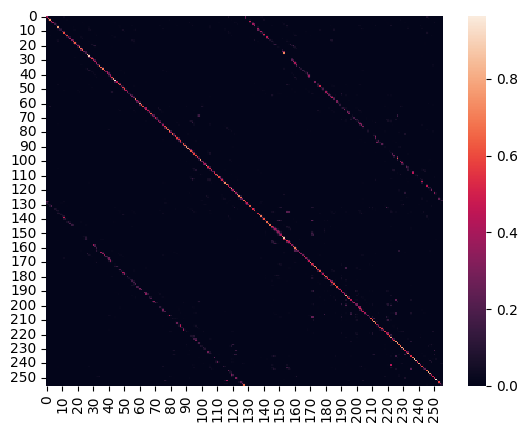

In [17]:
# After running a forward pass with attention outputs enabled
# attn_maps = model.harmony_encoder.layers[4].last_attn_weights  # example shape: [B, heads, L, L]
self_attns = model.get_attention_maps()

# Focus on one item in batch, one head
map = self_attns[1][0, 0, :, :].detach().cpu().numpy()
sns.heatmap(map)

In [18]:
save_dir='figs/attn_maps/SE/' + subfolder
if nvis is not None:
    save_dir += '_nvis' + str(nvis)

save_attention_maps_with_split(
    self_attns,
    melody_len=test_dataset.seq_len,
    save_dir=save_dir + '/self/',
    prefix='self'
)